# Imports and load data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import string
import re
import random
from PIL import Image
from pylab import rcParams

# Define figure properties
%matplotlib inline
rcParams['figure.figsize'] = 15, 7
sns.set_style("white")

In [2]:
# Load datasets
# read_rows = 10000. use nrows=read_rows as read_csv argument to read a smaller dataset for testing
death2005_df = pd.read_csv("2005_data.csv", dtype = {'358_cause_recode':object, 'method_of_disposition':str})
with open('2005_codes.json', 'r') as f_open:
    code_maps_2005 = json.load(f_open)

death2010_df = pd.read_csv("2010_data.csv", dtype = {'358_cause_recode':object, 'method_of_disposition':str})
with open('2010_codes.json', 'r') as f_open:
    code_maps_2010 = json.load(f_open)
    
death2015_df = pd.read_csv("2015_data.csv", dtype = {'358_cause_recode':object, 'method_of_disposition':str})
with open('2015_codes.json', 'r') as f_open:
    code_maps_2015 = json.load(f_open)
    
skull_img = np.array(Image.open("skull.png"))

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Recode and organize data

In [3]:
death_dfs = [death2005_df, death2010_df, death2015_df]
code_maps = [code_maps_2005, code_maps_2010, code_maps_2015]
years = [2005, 2010, 2015]

# Recode data from JSON dictionary
for d, m in zip(death_dfs, code_maps):
    d['manner_of_death_recoded'] = d['manner_of_death'].dropna(axis=0).map(int).map(str).apply(
        lambda x: m['manner_of_death'][x])
    d['358_cause_recode_text'] = d['358_cause_recode'].dropna(axis=0).apply(
        lambda x: m['358_cause_recode'][x])
    d['education_2003_revision_recoded'] = d['education_2003_revision'].dropna(axis=0).map(int).map(str).apply(
        lambda x: m['education_2003_revision'][x])
    d['method_of_disposition_recoded'] = d['method_of_disposition'].apply(
        lambda x: m['method_of_disposition'].get(x)) # Use get here to deal with missing keys in the JSON dictionary

# Add new column to track year of data
for d, y in zip(death_dfs,years):
    d['dataset_year']=y

In [4]:
# Preview 2005 death descriptive stats
pd.set_option('display.float_format', '{:.2g}'.format)
death2005_df.head()

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,...,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,manner_of_death_recoded,358_cause_recode_text,education_2003_revision_recoded,method_of_disposition_recoded,dataset_year
0,1,11,nan,0,1,F,1,45,nan,35,...,nan,1,1,100,6,Natural,Malignant melanoma of skin (C43),NaN,Unknown,2005
1,1,13,nan,0,1,M,1,61,nan,38,...,nan,1,1,100,6,Natural,Emphysema (J43),NaN,Unknown,2005
2,1,12,nan,0,1,F,1,79,nan,41,...,nan,1,1,100,6,Natural,Other cerebrovascular diseases and their seque...,NaN,Unknown,2005
3,1,12,nan,0,1,M,1,50,nan,36,...,nan,1,1,100,6,Natural,Diabetes mellitus (E10-E14),NaN,Unknown,2005
4,1,14,nan,0,1,F,1,68,nan,39,...,nan,1,1,100,6,Natural,"Of trachea, bronchus and lung (C33-C34)",NaN,Unknown,2005


In [5]:
# View column headers
# list(death2015_df)

In [6]:
# View common values in some columns
# death2015_df['method_of_disposition_recoded'].value_counts()

# Overview of deaths in 2005, 2010, and 2015

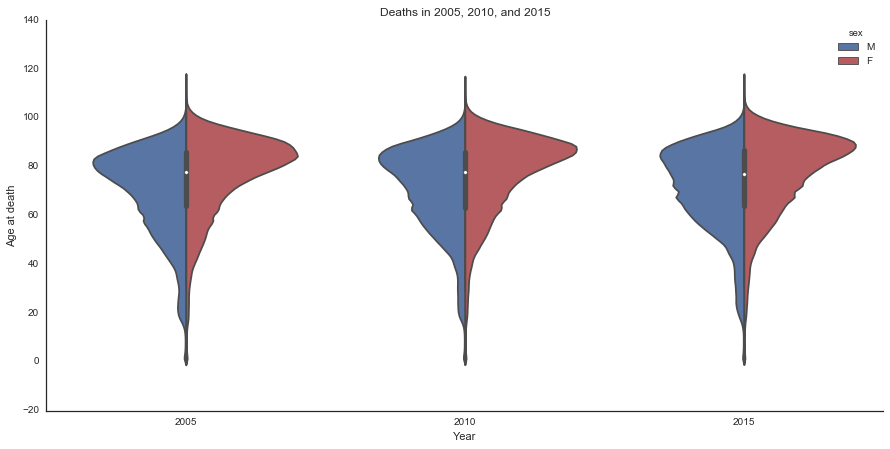

In [7]:
# Plot age of deaths (simplified to only include deaths age 1 and over)
trimmed2005_df = death2005_df[(death2005_df['detail_age']!=999) & (death2005_df['detail_age_type']==1)]
trimmed2010_df = death2010_df[(death2010_df['detail_age']!=999) & (death2010_df['detail_age_type']==1)]
trimmed2015_df = death2015_df[(death2015_df['detail_age']!=999) & (death2015_df['detail_age_type']==1)]
trimmed_dfs = [trimmed2005_df,trimmed2010_df,trimmed2015_df]
merged_trimmed = pd.concat(trimmed_dfs)
sns.violinplot(data=merged_trimmed,x='dataset_year',y='detail_age', hue='sex', split=True,hue_order=['M','F'], palette=['#4C72B0','#C44E52'])
plt.title('Deaths in 2005, 2010, and 2015')
plt.ylabel('Age at death')
plt.xlabel('Year')
sns.despine()

Men die in the age 15-30 range more than women

# What are the main causes of death in men aged 15-30?

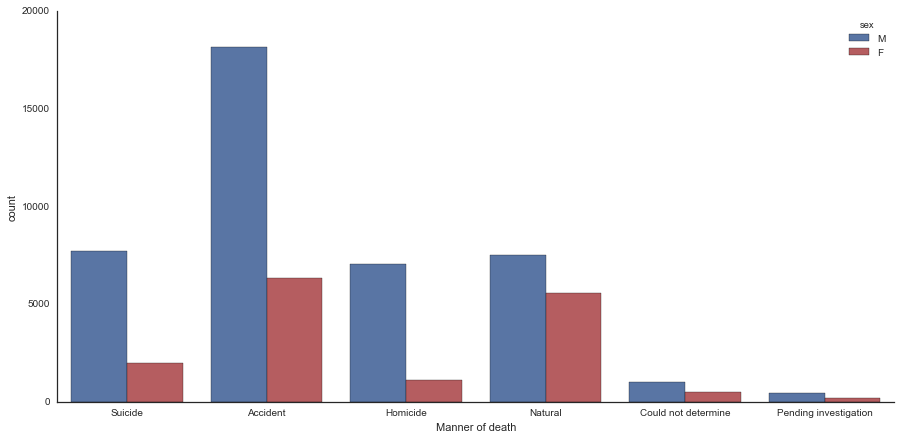

In [8]:
sns.countplot(data=trimmed2015_df[(trimmed2015_df['detail_age']>=15) &
                               (trimmed2015_df['detail_age']<=30)], x='manner_of_death_recoded', hue='sex', hue_order=['M','F'], palette=['#4C72B0','#C44E52'])
plt.xlabel('Manner of death')
sns.despine()

Suicide, accident, and homicide are responsible for most of the increased deaths in young men relative to young women (2015).

# Cause of death by age range

In [9]:
# Process strings for word cloud
regex = re.compile('[%s]' % re.escape(string.punctuation))

# Extract death description text from age groups
str2015_1_20 = ' '.join(trimmed2015_df[trimmed2015_df['detail_age']<21]['358_cause_recode_text'])
str2015_21_40 = ' '.join(trimmed2015_df[(trimmed2015_df['detail_age']>20) & (trimmed2015_df['detail_age']<41)]['358_cause_recode_text'])
str2015_41_60 = ' '.join(trimmed2015_df[(trimmed2015_df['detail_age']>40) & (trimmed2015_df['detail_age']<61)]['358_cause_recode_text'])
str2015_61_80 = ' '.join(trimmed2015_df[(trimmed2015_df['detail_age']>60) & (trimmed2015_df['detail_age']<81)]['358_cause_recode_text'])
str2015_81_100 = ' '.join(trimmed2015_df[(trimmed2015_df['detail_age']>80) & (trimmed2015_df['detail_age']<101)]['358_cause_recode_text'])
str2015_101_120 = ' '.join(trimmed2015_df[(trimmed2015_df['detail_age']>100) & (trimmed2015_df['detail_age']<121)]['358_cause_recode_text'])

# Eliminate puncutations
strs_in = [str2015_1_20,str2015_21_40,str2015_41_60,str2015_61_80,str2015_81_100,str2015_101_120]
strs_temp = [None,]*6
strs_out = [None,]*6

for i, s in zip(range(len(strs_out)), strs_in):
    strs_temp[i] = regex.sub(' ', s)
    strs_out[i] = ' '.join( [w for w in strs_temp[i].split() if len(w)>3] )

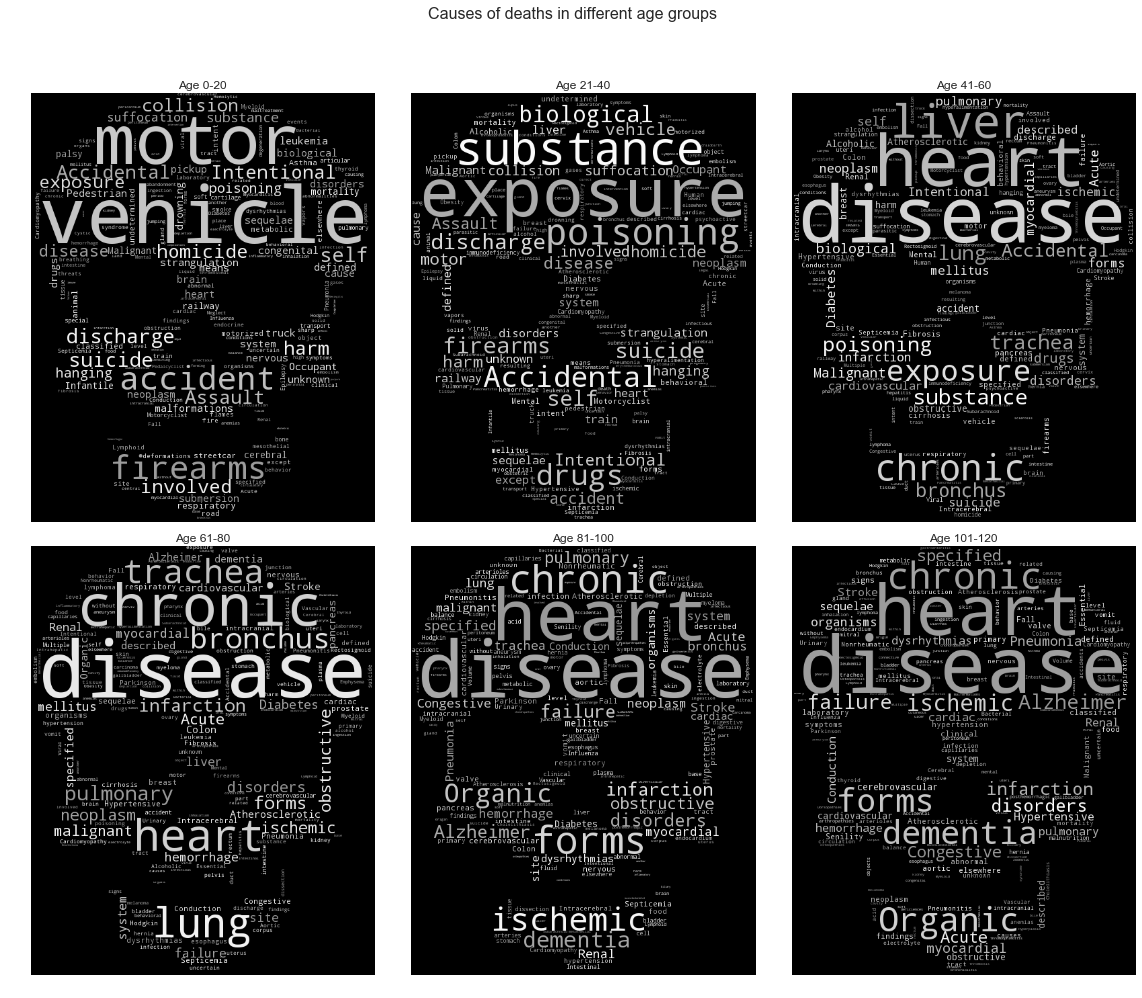

In [10]:
# Wordcloud specifications
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
stopwords = set(wordcloud.STOPWORDS)
stopwords.add("unspecified")

# Generate and plot
fig, axs = plt.subplots(2,3,figsize=(16,14))
wcs = [wordcloud.WordCloud(),
       wordcloud.WordCloud(),
       wordcloud.WordCloud(),
       wordcloud.WordCloud(),
       wordcloud.WordCloud(),
       wordcloud.WordCloud()]

wc_titles = ['Age 0-20','Age 21-40','Age 41-60','Age 61-80','Age 81-100','Age 101-120']
for i, s, t in zip(range(len(wcs)),strs_out,wc_titles):
    wcs[i] = wordcloud.WordCloud(mask=skull_img, background_color="black",max_words=200, stopwords=stopwords).generate(s)
    ax = plt.subplot(2,3,i+1)
    ax.set_title(t)
    plt.imshow(wcs[i].recolor(color_func=grey_color_func, random_state=3))
    plt.axis("off")
fig.suptitle("Causes of deaths in different age groups", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

The leading causes of death below the age of 40 are injury/suicide/accidents, while the leading causes of deaths above the age of 40 are related to diseases.

# Education levels of those that died in 2015

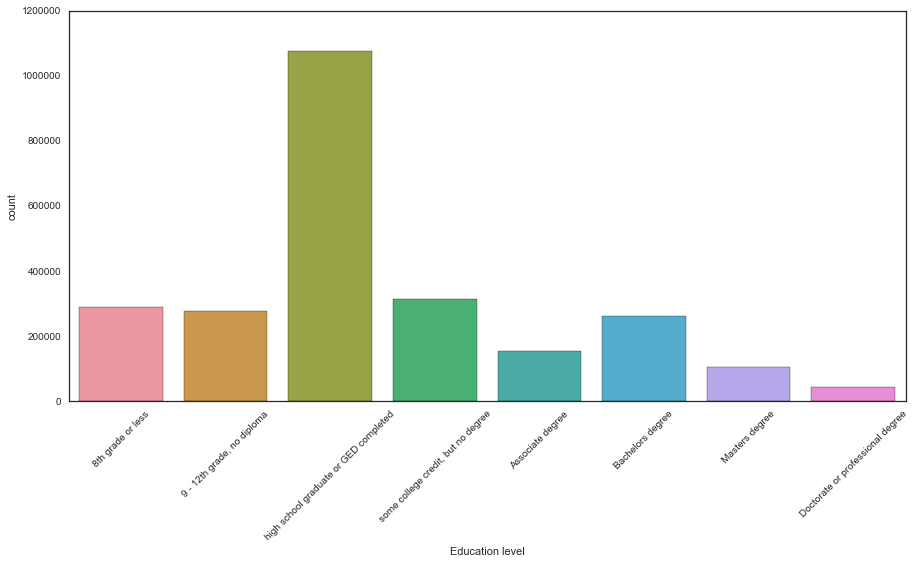

In [11]:
# Education level of those that died in 2015 (does not include education_1989_revision)
death2015_df['education_2003_revision_recoded'] = death2015_df['education_2003_revision_recoded'].str.encode('utf-8').str.decode('ascii', 'ignore')

sns.countplot(data=death2015_df[death2015_df['education_2003_revision_recoded']!='Unknown'], 
              x='education_2003_revision_recoded',
              order=["8th grade or less",
                     "9 - 12th grade, no diploma",
                     "high school graduate or GED completed",
                     "some college credit, but no degree",
                     "Associate degree",
                     "Bachelors degree",
                     "Masters degree",
                     "Doctorate or professional degree"])
plt.xticks(rotation=45);
plt.xlabel('Education level');

The majority of those that died in 2015 did not have a Bachelor's degree

# Burial vs. Cremation

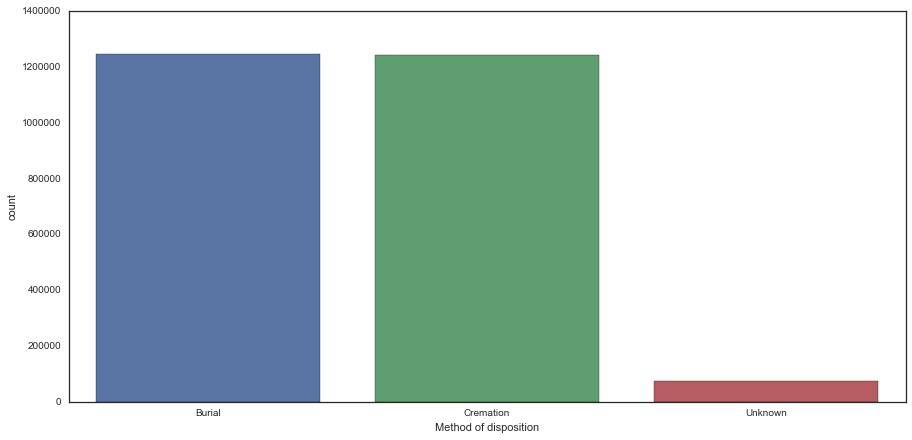

In [13]:
sns.countplot(data=death2015_df[death2015_df['method_of_disposition_recoded']!='Other'], x='method_of_disposition_recoded')
plt.xlabel('Method of disposition');

Burials and cremations occured roughly equally in 2015.